# day 102

# DBSCAN versus KMeans clustering


# DBSCAN:

eps: is epsilon is the distance of area from the core point. big epsilon,bigger range, less unique clusters. smaller epsilon, smaller range, more unique clusters 



min_samples: is the minimum # of points to be included within the epsilon distance.


**optimum min_samples: 2* number of features of the data**


# source for knowledge:
check out visualizing DBSCAN clustering site for clear understanding of how eps and min_samples work


# KMeans:

n_cluster: number of clusters to form which is manually/programmatically inputed based on situational condition. 

In [1]:
import numpy as np
import sympy as sym
from IPython.display import display,Math
sym.init_printing()
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [5]:
blobs = pd.read_csv('C:\\Users\\ADMIN\\Desktop\\MACHINE LEARNING NOTEBOOKS\\DATA\\cluster_blobs.csv')

In [6]:
blobs.head()

X1        X2
0  4.645333  6.822294
1  4.784032  6.422883
2 -5.851786  5.774331
3 -7.459592  6.456415
4  4.918911  6.961479

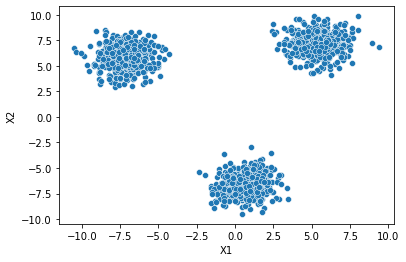

In [7]:
sns.scatterplot(data=blobs,x='X1',y='X2')

plt.show()

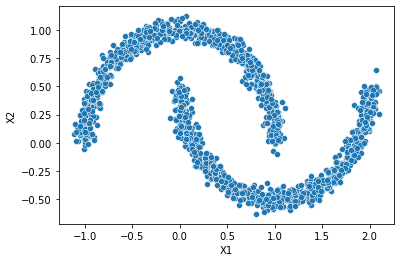

In [10]:
moons = pd.read_csv('C:\\Users\\ADMIN\\Desktop\\MACHINE LEARNING NOTEBOOKS\\DATA\\cluster_moons.csv')

sns.scatterplot(data=moons,x='X1',y='X2')


plt.show()


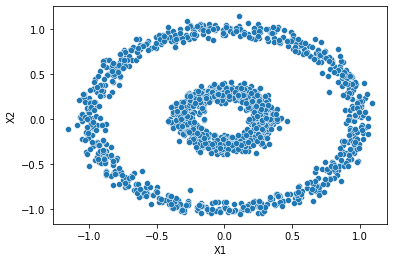

In [11]:
circles = pd.read_csv('C:\\Users\\ADMIN\\Desktop\\MACHINE LEARNING NOTEBOOKS\\DATA\\cluster_circles.csv')

sns.scatterplot(data=circles,x='X1',y='X2')


plt.show()

In [12]:
def display(model,data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')
    
    
    plt.show()
    

# testing kmeans

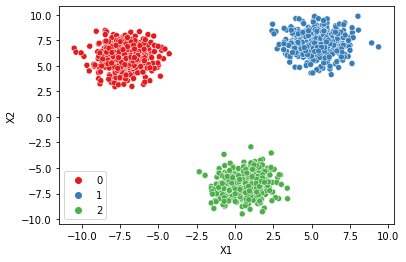

In [13]:
from sklearn.cluster import KMeans

k = KMeans(n_clusters=3)

display(k,blobs)

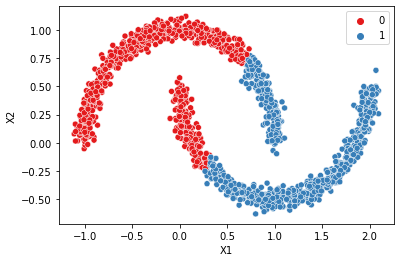

In [17]:
k = KMeans(n_clusters=2)

display(k,moons)

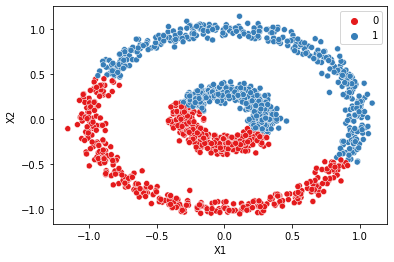

In [18]:
k = KMeans(n_clusters=2)

display(k,circles)

# conclusion:

KMeans clustering fails to distinctify the objects perfectly because this algorithm works based on how closer the point is to the distance of the center of nearby cluster. 

# testing DBSCAN clustering

In [30]:
from sklearn.cluster import DBSCAN

DB = DBSCAN(eps=1,min_samples=2)



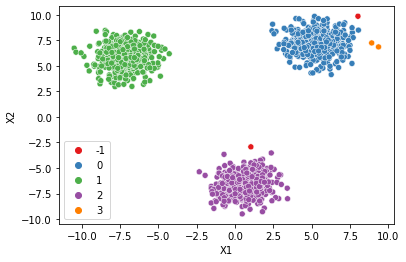

In [31]:
display(DB,blobs)

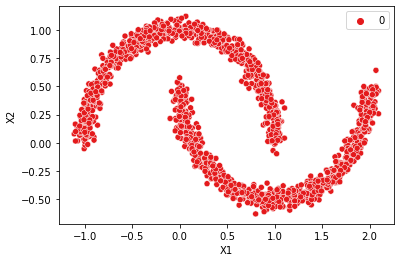

In [33]:
display(DB,moons)

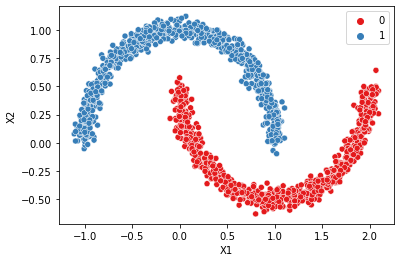

In [37]:
# adjustment in epsilon value

DB = DBSCAN(eps=0.15,min_samples=2)

display(DB,moons)

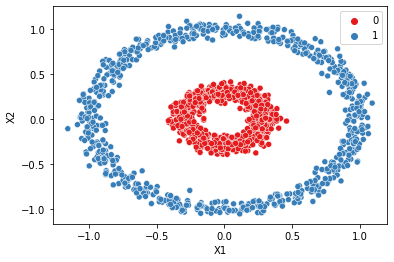

In [38]:
# adjustment in epsilon value

DB = DBSCAN(eps=0.15,min_samples=2)

display(DB,circles)

# hyperparameter tuning

In [39]:
two_blobs = pd.read_csv('C:\\Users\\ADMIN\\Desktop\\MACHINE LEARNING NOTEBOOKS\\DATA\\cluster_two_blobs.csv')

two_blobs

X1        X2
0    0.046733  1.765120
1   -8.994134 -6.508186
2    0.650539  1.264533
3   -9.501554 -6.736493
4    0.057050  0.188215
..        ...       ...
995 -9.895227 -6.644544
996 -9.544007 -6.060362
997  0.713958  1.560460
998  0.954444  0.889178
999 -8.867767 -5.635758

[1000 rows x 2 columns]

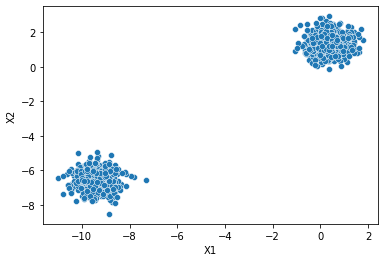

In [41]:
sns.scatterplot(data=two_blobs,x='X1',y='X2')


plt.show()

In [42]:
two_blobs_outliers = pd.read_csv('C:\\Users\\ADMIN\\Desktop\\MACHINE LEARNING NOTEBOOKS\\DATA\\cluster_two_blobs_outliers.csv')


In [44]:
two_blobs_outliers.head()

X1        X2
0  0.046733  1.765120
1 -8.994134 -6.508186
2  0.650539  1.264533
3 -9.501554 -6.736493
4  0.057050  0.188215

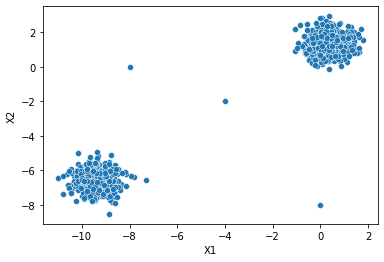

In [45]:
sns.scatterplot(data=two_blobs_outliers,x='X1',y='X2')

plt.show()

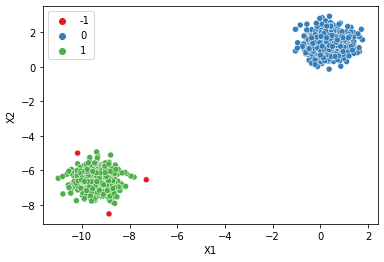

In [47]:
DB = DBSCAN() # by default eps = 0.5 and min_samples = 2

display(DB,two_blobs)

# remember a bigger epsilon would make the search area a bigger resulting in few outliers selection.

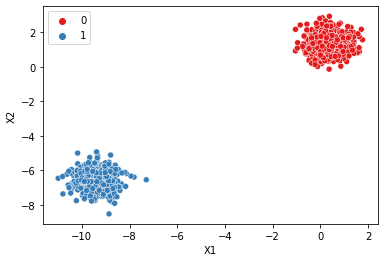

In [48]:
DB = DBSCAN(eps=1,min_samples=2) 
display(DB,two_blobs)

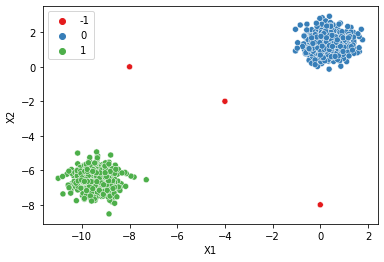

In [70]:
DB = DBSCAN(eps=0.67,min_samples=2) 
display(DB,two_blobs_outliers)

# getting the total number of outliers

In [50]:
np.sum(DB.labels_ == -1)

3

# optimising the eps using  elbow method

In [72]:
number_of_outliers = []

for i in np.linspace(0.001,1,200):
    
    DB = DBSCAN(eps=i)
    
    DB.fit(two_blobs_outliers)
    
    # total number of outliers
    
    number_of_outliers.append(np.sum(DB.labels_ == -1 ))
    


In [73]:
number_of_outliers[0:14] # just to see few points of 100 total points

[1003, 1003, 1003, 1003, 1003, 1003, 993, 981, 963, 914, 867, 798, 716, 648]

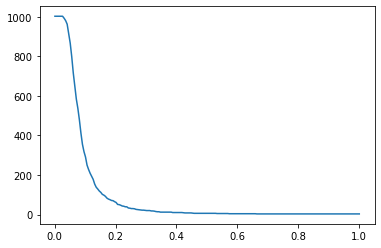

In [75]:
plt.plot(np.linspace(0.001,1,200),number_of_outliers)

plt.show()

# zooming in on the plot to observe the change

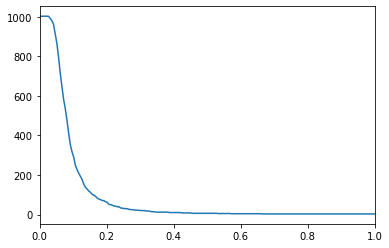

In [77]:
plt.plot(np.linspace(0.001,1,200),number_of_outliers)

plt.xlim(0,1)
plt.show()


# conclusion

I observe at around 0.5 the line got stabilized which means it finds the same # of outliers throughout

but lets zoom in even more to see where it get stablized

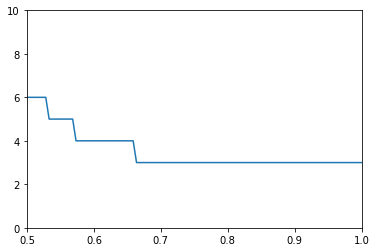

In [81]:
plt.plot(np.linspace(0.001,1,200),number_of_outliers)

plt.xlim(0.5,1)
plt.ylim(0,10)

plt.show()

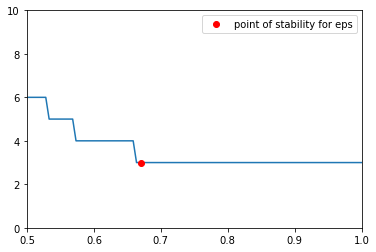

In [84]:
plt.plot(np.linspace(0.001,1,200),number_of_outliers)
plt.plot(0.67,3,'ro',label='point of stability for eps')
plt.xlim(0.5,1)
plt.ylim(0,10)


plt.legend()
plt.show()

# the ideal # of min_samples

**number of dimension of the plot * 2**

In [82]:
np.shape(two_blobs_outliers)

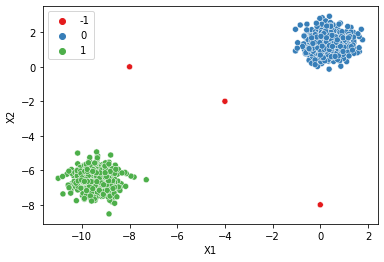

In [85]:

n_dim = np.shape(two_blobs_outliers)[1]
DB = DBSCAN(eps=0.67,min_samples=n_dim*2) 
display(DB,two_blobs_outliers)